<a href="https://colab.research.google.com/github/hepvarbifikri/istanbuldatascienceacademy/blob/main/WTWY_Last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#kütüphane ekleme

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#data çekme

def get_data(date_list):
    
    mta = []
    Source_URL = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    
    for date in date_list:  
        
        url = Source_URL.format(date)
        mta.append(pd.read_csv(url))    
                   
    return pd.concat(mta)    
                   
date_list = ['190525'] 
                   
df = get_data(date_list)

In [3]:
#index resetleme 

df.reset_index(drop=True, inplace=True)

In [16]:
#data info

df.shape
df.info()
df.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203363 entries, 0 to 203362
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   STATION       203363 non-null  object        
 1   DIVISION      203363 non-null  object        
 2   DATE          203363 non-null  object        
 3   TIME          203363 non-null  object        
 4   DESC          203363 non-null  object        
 5   ENTRIES       203363 non-null  int64         
 6   EXITS         203363 non-null  int64         
 7   TURNSTILE_ID  203363 non-null  object        
 8   DATE_TIME     203363 non-null  datetime64[ns]
 9   NET_ENTRIES   201535 non-null  float64       
 10  NET_EXITS     201852 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 26.7+ MB


,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE_ID,DATE_TIME,NET_ENTRIES,NET_EXITS
0,59 ST,BMT,05/18/2019,00:00:00,REGULAR,7062481,2393489,A002-R051-02-00-00,2019-05-18 00:00:00,24.0,3.0
1,59 ST,BMT,05/18/2019,04:00:00,REGULAR,7062505,2393492,A002-R051-02-00-00,2019-05-18 04:00:00,24.0,34.0
2,59 ST,BMT,05/18/2019,08:00:00,REGULAR,7062529,2393526,A002-R051-02-00-00,2019-05-18 08:00:00,98.0,86.0
3,59 ST,BMT,05/18/2019,12:00:00,REGULAR,7062627,2393612,A002-R051-02-00-00,2019-05-18 12:00:00,208.0,50.0
4,59 ST,BMT,05/18/2019,16:00:00,RECOVR AUD,7062835,2393662,A002-R051-02-00-00,2019-05-18 16:00:00,262.0,34.0
5,59 ST,BMT,05/18/2019,20:00:00,REGULAR,7063097,2393696,A002-R051-02-00-00,2019-05-18 20:00:00,183.0,23.0
6,59 ST,BMT,05/19/2019,00:00:00,REGULAR,7063280,2393719,A002-R051-02-00-00,2019-05-19 00:00:00,28.0,6.0
7,59 ST,BMT,05/19/2019,04:00:00,REGULAR,7063308,2393725,A002-R051-02-00-00,2019-05-19 04:00:00,8.0,19.0
8,59 ST,BMT,05/19/2019,08:00:00,REGULAR,7063316,2393744,A002-R051-02-00-00,2019-05-19 08:00:00,77.0,49.0
9,59 ST,BMT,05/19/2019,12:00:00,REGULAR,7063393,2393793,A002-R051-02-00-00,2019-05-19 12:00:00,199.0,44.0


In [5]:
#kolon düzenleme

df.columns = df.columns.str.strip()
df['TURNSTILE_ID'] = df["C/A"]+ "-" + df["UNIT"] + "-" + df["SCP"]
df['DATE_TIME'] = df["DATE"] + "-" + df["TIME"]
df.drop(columns = ["LINENAME", "C/A", "UNIT", "SCP"], inplace=True)
df.head()

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE_ID,DATE_TIME
0,59 ST,BMT,05/18/2019,00:00:00,REGULAR,7062481,2393489,A002-R051-02-00-00,05/18/2019-00:00:00
1,59 ST,BMT,05/18/2019,04:00:00,REGULAR,7062505,2393492,A002-R051-02-00-00,05/18/2019-04:00:00
2,59 ST,BMT,05/18/2019,08:00:00,REGULAR,7062529,2393526,A002-R051-02-00-00,05/18/2019-08:00:00
3,59 ST,BMT,05/18/2019,12:00:00,REGULAR,7062627,2393612,A002-R051-02-00-00,05/18/2019-12:00:00
4,59 ST,BMT,05/18/2019,16:00:00,RECOVR AUD,7062835,2393662,A002-R051-02-00-00,05/18/2019-16:00:00


In [6]:
#tarih zaman formatı

df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%m/%d/%Y-%H:%M:%S')

In [9]:
#gruplama sıralama

df = df.sort_values(by=['TURNSTILE_ID','DATE_TIME','STATION'])
df.head(100)

#df.sort_values('DATE_TIME','STATION','TURNSTILE_ID', ascending=True)
# df.groupby(["STATION","TURNSTILE_ID"])
#df.head(100)

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE_ID,DATE_TIME
0,59 ST,BMT,05/18/2019,00:00:00,REGULAR,7062481,2393489,A002-R051-02-00-00,2019-05-18 00:00:00
1,59 ST,BMT,05/18/2019,04:00:00,REGULAR,7062505,2393492,A002-R051-02-00-00,2019-05-18 04:00:00
2,59 ST,BMT,05/18/2019,08:00:00,REGULAR,7062529,2393526,A002-R051-02-00-00,2019-05-18 08:00:00
3,59 ST,BMT,05/18/2019,12:00:00,REGULAR,7062627,2393612,A002-R051-02-00-00,2019-05-18 12:00:00
4,59 ST,BMT,05/18/2019,16:00:00,RECOVR AUD,7062835,2393662,A002-R051-02-00-00,2019-05-18 16:00:00
...,...,...,...,...,...,...,...,...,...
95,59 ST,BMT,05/19/2019,04:00:00,REGULAR,1234153,4640697,A002-R051-02-03-00,2019-05-19 04:00:00
96,59 ST,BMT,05/19/2019,08:00:00,REGULAR,1234157,4640729,A002-R051-02-03-00,2019-05-19 08:00:00
97,59 ST,BMT,05/19/2019,12:00:00,REGULAR,1234181,4640906,A002-R051-02-03-00,2019-05-19 12:00:00
98,59 ST,BMT,05/19/2019,16:00:00,REGULAR,1234253,4641157,A002-R051-02-03-00,2019-05-19 16:00:00


In [10]:
#Net giriş hesabı

df['NET_ENTRIES'] = df['ENTRIES']


i = 1
value = len(df.TURNSTILE_ID)

for ID in range(value-1) :  
    
    if df['TURNSTILE_ID'][i] == df['TURNSTILE_ID'][i-1]:
        df['NET_ENTRIES'][i-1] = df['ENTRIES'][i]-df['ENTRIES'][i-1]
    else:
        
        df['NET_ENTRIES'][i-1] = 0
        df['NET_ENTRIES'][i] = df['ENTRIES'][i+1]-df['ENTRIES'][i]
         
    i = i+1
    
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE_ID,DATE_TIME,NET_ENTRIES
0,59 ST,BMT,05/18/2019,00:00:00,REGULAR,7062481,2393489,A002-R051-02-00-00,2019-05-18 00:00:00,24
1,59 ST,BMT,05/18/2019,04:00:00,REGULAR,7062505,2393492,A002-R051-02-00-00,2019-05-18 04:00:00,24
2,59 ST,BMT,05/18/2019,08:00:00,REGULAR,7062529,2393526,A002-R051-02-00-00,2019-05-18 08:00:00,98
3,59 ST,BMT,05/18/2019,12:00:00,REGULAR,7062627,2393612,A002-R051-02-00-00,2019-05-18 12:00:00,208
4,59 ST,BMT,05/18/2019,16:00:00,RECOVR AUD,7062835,2393662,A002-R051-02-00-00,2019-05-18 16:00:00,262


In [12]:
#net çıkış hesabı

df['NET_EXITS'] = df['EXITS']

k = 1
value = len(df.TURNSTILE_ID)


for ID in range(value-1) :  
    
    if df['TURNSTILE_ID'][k] == df['TURNSTILE_ID'][k-1]:
        df['NET_EXITS'][k-1] = df['EXITS'][k]-df['EXITS'][k-1]
    else:
        
        df['NET_EXITS'][k-1] = 0
        df['NET_EXITS'][k] = df['EXITS'][k+1]-df['EXITS'][k]
        
    k = k+1
    

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE_ID,DATE_TIME,NET_ENTRIES,NET_EXITS
0,59 ST,BMT,05/18/2019,00:00:00,REGULAR,7062481,2393489,A002-R051-02-00-00,2019-05-18 00:00:00,24,3
1,59 ST,BMT,05/18/2019,04:00:00,REGULAR,7062505,2393492,A002-R051-02-00-00,2019-05-18 04:00:00,24,34
2,59 ST,BMT,05/18/2019,08:00:00,REGULAR,7062529,2393526,A002-R051-02-00-00,2019-05-18 08:00:00,98,86
3,59 ST,BMT,05/18/2019,12:00:00,REGULAR,7062627,2393612,A002-R051-02-00-00,2019-05-18 12:00:00,208,50
4,59 ST,BMT,05/18/2019,16:00:00,RECOVR AUD,7062835,2393662,A002-R051-02-00-00,2019-05-18 16:00:00,262,34


In [14]:
#outlier eleme

df['NET_ENTRIES'][df['NET_ENTRIES']>10000] = np.nan
df['NET_ENTRIES'][df['NET_ENTRIES']<0] = np.nan
df['NET_EXITS'][df['NET_EXITS']>10000] = np.nan
df['NET_EXITS'][df['NET_EXITS']<0] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [18]:
print("Maximum date: ")
print(df["NET_ENTRIES"].max())
print()
print("Minimum date: ")
print(df["NET_ENTRIES"].min())
print(df["TOTAL_TRAFFIC"].max())

Maximum date: 
9866.0

Minimum date: 
0.0
12527.0


In [17]:
#toplam yolcu hesabı

df['TOTAL_TRAFFIC'] = df['NET_ENTRIES'] + df['NET_EXITS']

In [19]:
#gün kolonu ekleme

df['WEEKDAY'] = pd.to_datetime(df['DATE']).dt.day_name()

In [24]:
df.head()

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE_ID,DATE_TIME,NET_ENTRIES,NET_EXITS,TOTAL_TRAFFIC,WEEKDAY
0,59 ST,BMT,05/18/2019,00:00:00,REGULAR,7062481,2393489,A002-R051-02-00-00,2019-05-18 00:00:00,24.0,3.0,27.0,Saturday
1,59 ST,BMT,05/18/2019,04:00:00,REGULAR,7062505,2393492,A002-R051-02-00-00,2019-05-18 04:00:00,24.0,34.0,58.0,Saturday
2,59 ST,BMT,05/18/2019,08:00:00,REGULAR,7062529,2393526,A002-R051-02-00-00,2019-05-18 08:00:00,98.0,86.0,184.0,Saturday
3,59 ST,BMT,05/18/2019,12:00:00,REGULAR,7062627,2393612,A002-R051-02-00-00,2019-05-18 12:00:00,208.0,50.0,258.0,Saturday
4,59 ST,BMT,05/18/2019,16:00:00,RECOVR AUD,7062835,2393662,A002-R051-02-00-00,2019-05-18 16:00:00,262.0,34.0,296.0,Saturday


In [ ]:
#dataframe kayıt

df.to_csv("WTWY_MTA_Project1_data_last.csv")

In [22]:
#en kalabalık 5 istasyon

mta_top5 = df.groupby(["STATION"]).sum().sort_values(["TOTAL_TRAFFIC"],ascending=False).head(5)
mta_top5 = mta_top5.reset_index()
mta_top5


,STATION,ENTRIES,EXITS,NET_ENTRIES,NET_EXITS,TOTAL_TRAFFIC
0,34 ST-PENN STA,166574554163,176370219806,1031553.0,949208.0,1980761.0
1,GRD CNTRL-42 ST,114005666958,140699083219,866696.0,756873.0,1614863.0
2,34 ST-HERALD SQ,197182599578,247047255670,711798.0,707848.0,1391769.0
3,14 ST-UNION SQ,30286395592,15854380440,639093.0,586642.0,1225735.0
4,23 ST,243324396539,211209287781,698471.0,525706.0,1217833.0


In [25]:
#station day data

data2 = df
mta_day = data2.groupby("WEEKDAY").sum().sort_values("TOTAL_TRAFFIC",ascending=False)
mta_day = mta_day.reset_index()
mta_day


,WEEKDAY,ENTRIES,EXITS,NET_ENTRIES,NET_EXITS,TOTAL_TRAFFIC
0,Tuesday,1309930332316,1071016714226,6467959.0,5072831.0,11495825.0
1,Wednesday,1219236758652,987069811762,6006637.0,4684259.0,10650196.0
2,Monday,1229275342358,1004301242225,5858563.0,4590374.0,10409075.0
3,Thursday,1238449087110,999730613688,5770072.0,4504827.0,10235747.0
4,Friday,1280643726682,1033521657754,5103800.0,3984841.0,9054953.0
5,Saturday,1210662664122,991179873161,3509637.0,2922407.0,6402375.0
6,Sunday,1219426358514,992556661531,2704176.0,2265455.0,4945498.0


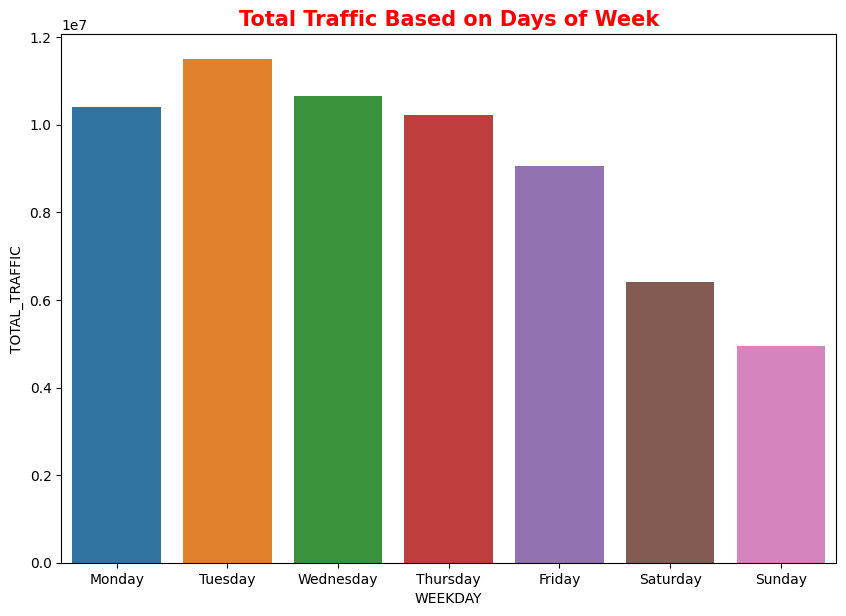

In [26]:
#Barplot for total traffic

plt.figure(figsize=(10,7),dpi=100),
ax = sns.barplot(x="WEEKDAY",y="TOTAL_TRAFFIC",data=mta_day, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Total Traffic Based on Days of Week", weight="bold", c="red",fontsize=15)
plt.show()


Text(0.5, 1.0, 'Top 5 Busiest Stations')

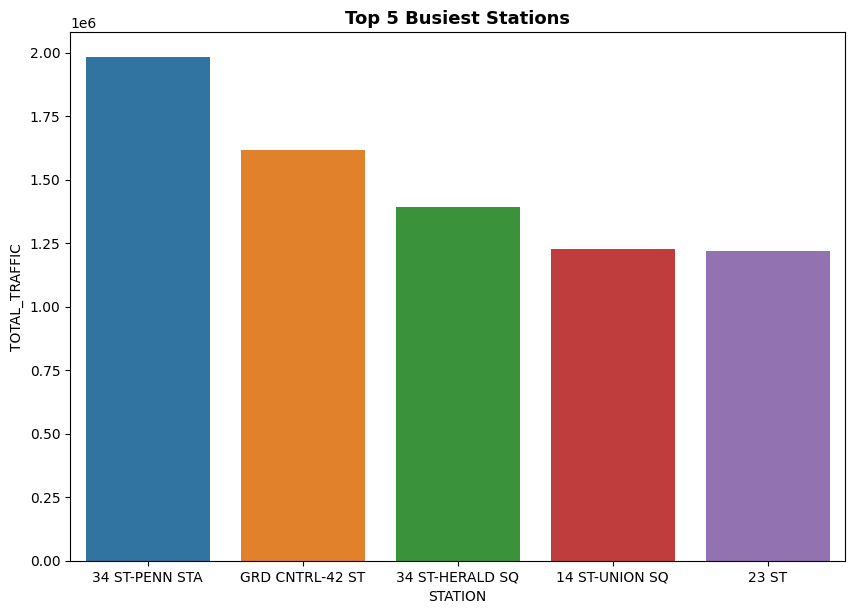

In [23]:
plt.figure(figsize=(10,7),dpi=100),
ax = sns.barplot(x="STATION", y="TOTAL_TRAFFIC", data=mta_top5)
plt.title("Top 5 Busiest Stations", weight="bold", c="black", fontsize=13)

In [41]:
#

group = df.groupby(['STATION','WEEKDAY'])['TOTAL_TRAFFIC'].sum()
group = group.reset_index()

In [42]:

group.sort_values(by='TOTAL_TRAFFIC')
group = group[group['STATION']=='34 ST-PENN STA']
group.head(50)

,STATION,WEEKDAY,TOTAL_TRAFFIC
425,34 ST-PENN STA,Friday,279471.0
426,34 ST-PENN STA,Monday,323732.0
427,34 ST-PENN STA,Saturday,192278.0
428,34 ST-PENN STA,Sunday,160302.0
429,34 ST-PENN STA,Thursday,342439.0
430,34 ST-PENN STA,Tuesday,342422.0
431,34 ST-PENN STA,Wednesday,340117.0


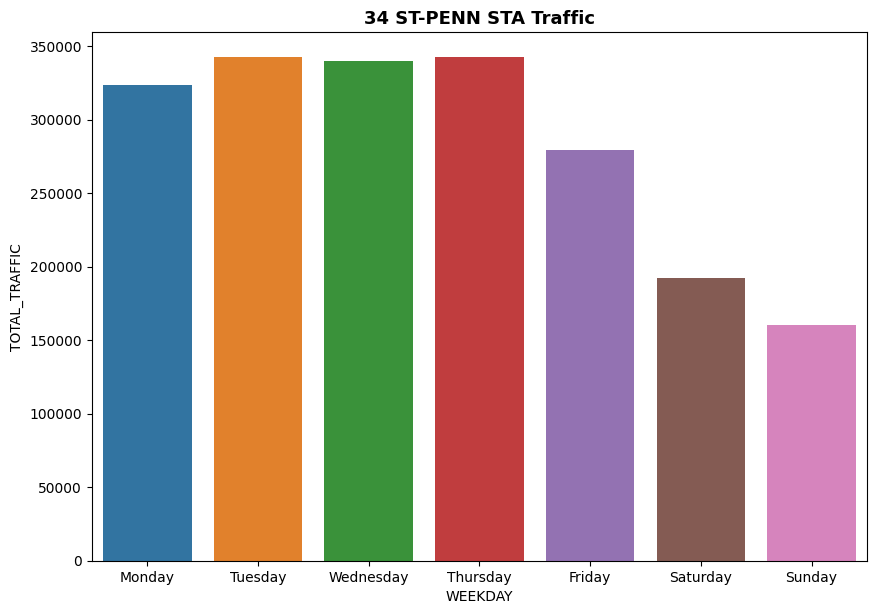

In [54]:
plt.figure(figsize=(10,7),dpi=100),
bx = sns.barplot(x="WEEKDAY",y="TOTAL_TRAFFIC",data=group, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("34 ST-PENN STA Traffic", weight="bold", c="k",fontsize=13)
plt.show()


In [70]:
data3 = df


data3 = data3.groupby(['STATION','WEEKDAY'])['TOTAL_TRAFFIC'].sum()
data3 = data3.reset_index()
data3.head()


,STATION,WEEKDAY,TOTAL_TRAFFIC
0,1 AV,Friday,35169.0
1,1 AV,Monday,37801.0
2,1 AV,Saturday,16829.0
3,1 AV,Sunday,11623.0
4,1 AV,Thursday,41880.0


In [76]:
data4 = df

data4 = data4.groupby(['STATION','WEEKDAY'])['TOTAL_TRAFFIC'].sum().sort_values().head(100)
data4 = data4.reset_index()


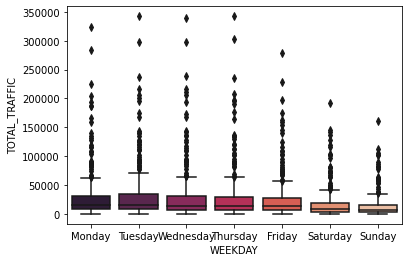

In [71]:

sns.boxplot(x='WEEKDAY',y='TOTAL_TRAFFIC',palette="rocket", data=data3, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])


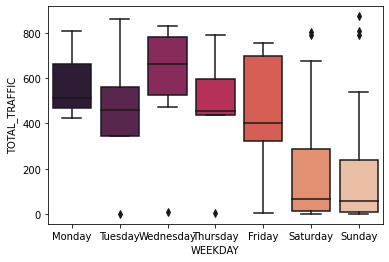

In [77]:

sns.boxplot(x='WEEKDAY',y='TOTAL_TRAFFIC',palette="rocket", data=data4, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [82]:
#en kalabalık 5 istasyon

mta_top5X = df.groupby(["WEEKDAY","STATION"]).sum().sort_values(["TOTAL_TRAFFIC"],ascending=False).head(100)
mta_top5X = mta_top5X.reset_index()
mta_top5X


,WEEKDAY,STATION,ENTRIES,EXITS,NET_ENTRIES,NET_EXITS,TOTAL_TRAFFIC
0,Thursday,34 ST-PENN STA,23063291788,24318756739,180286.0,162153.0,342439.0
1,Tuesday,34 ST-PENN STA,28296319390,30518068048,180175.0,162247.0,342422.0
2,Wednesday,34 ST-PENN STA,23030368516,24288367027,178003.0,162114.0,340117.0
3,Monday,34 ST-PENN STA,23028087159,24286381510,172461.0,151271.0,323732.0
4,Thursday,GRD CNTRL-42 ST,15606775008,18913160323,163797.0,140556.0,302857.0
...,...,...,...,...,...,...,...
95,Monday,CHAMBERS ST,30146593891,26641348619,63071.0,46066.0,108499.0
96,Friday,59 ST COLUMBUS,20681456312,18006642257,57381.0,51069.0,108450.0
97,Monday,FLUSHING-MAIN,3870143897,3925929548,59043.0,49032.0,108075.0
98,Thursday,FLUSHING-MAIN,1220385282,1158628824,57881.0,48115.0,105996.0


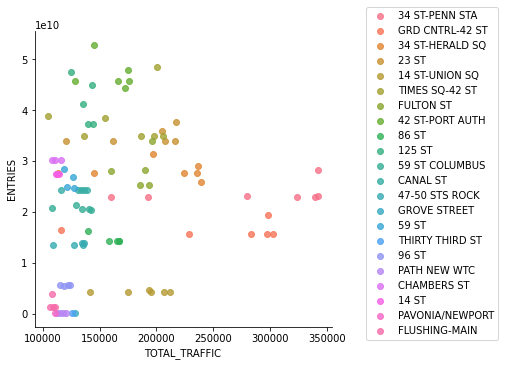

In [87]:
sns.lmplot( x="TOTAL_TRAFFIC", y="ENTRIES", data=mta_top5X, fit_reg=False, hue='STATION', legend=False, )

plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1.1))

plt.show()


In [109]:
#penn_time = df.groupby("STATION","WEEKDAY").sum().sort_values("TOTAL_TRAFFIC", ascending=False).head(20)



penn_time = df.groupby(['WEEKDAY', 'TIME'])['TOTAL_TRAFFIC'].sum().round().reset_index()

penn_hm = penn_time.pivot(index=["TIME"], columns=['WEEKDAY'], values='TOTAL_TRAFFIC').head(20)


([<matplotlib.axis.YTick at 0x7f379d51c9d0>,
 [Text(0, 0.5, '00:00'),
  Text(0, 1.5, '04:00'),
  Text(0, 2.5, '08:00'),
  Text(0, 3.5, '12:00'),
  Text(0, 4.5, '16:00'),
  Text(0, 5.5, '20:00'),
  Text(0, 6.5, '00:00')])

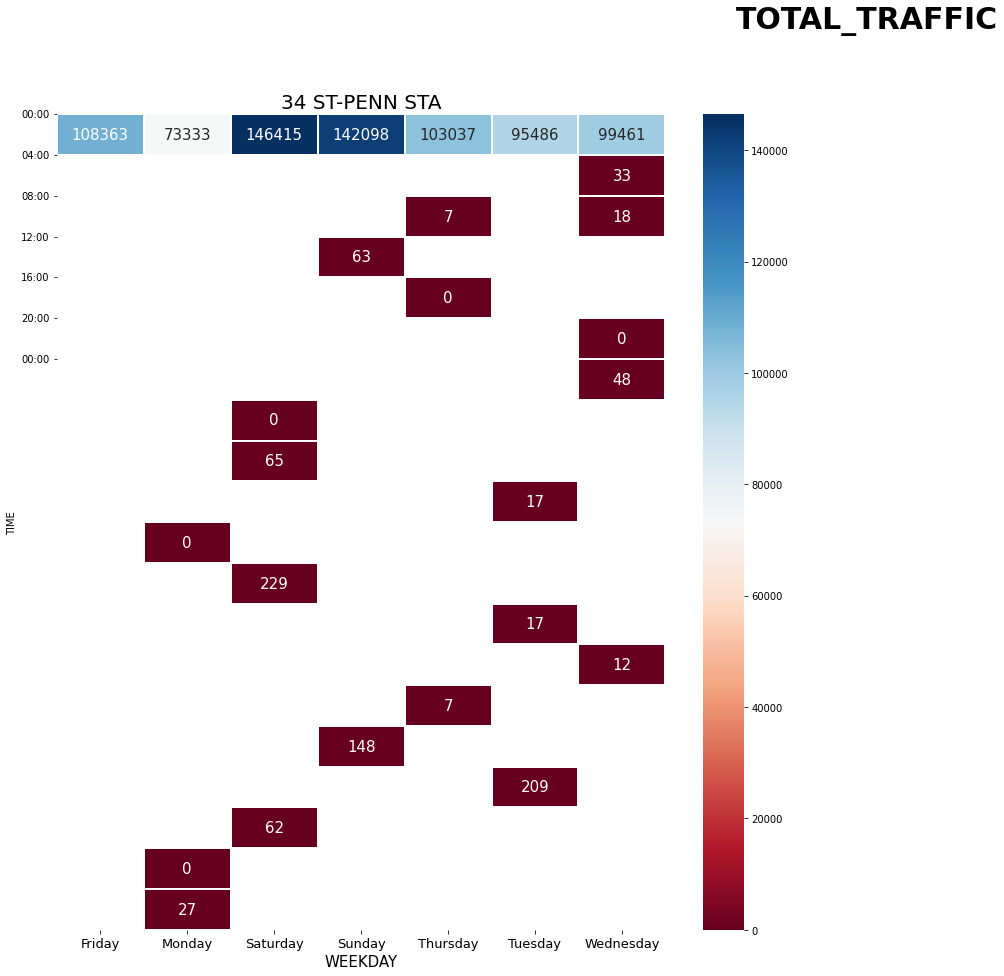

In [110]:
plt.figure(figsize=[30,15])
plt.suptitle("TOTAL_TRAFFIC", size=30, weight='bold')
plt.subplot(1,2,1)
sns.heatmap(penn_hm, cmap='RdBu', linecolor='white', linewidths=1, annot=True, fmt=".0f", annot_kws={"size":15})
plt.title("34 ST-PENN STA", size=20)
plt.xlabel("WEEKDAY", size=15)
plt.xticks(size=13)
plt.yticks([0,1,2,3,4,5,6],["00:00","04:00","08:00","12:00","16:00","20:00","00:00"])

In [122]:
#dattaa = df.groupby("STATION").sum().sort_values(by=["TOTAL_TRAFFIC"]).head(100)
dattaa = df.groupby(['WEEKDAY', 'TIME'])['TOTAL_TRAFFIC'].sum().round().reset_index()
dattaa

,WEEKDAY,TIME,TOTAL_TRAFFIC
0,Friday,00:00:00,108363.0
1,Friday,00:05:12,20.0
2,Friday,00:13:38,60.0
3,Friday,00:14:49,42.0
4,Friday,00:15:50,3.0
...,...,...,...
10154,Wednesday,23:51:34,67.0
10155,Wednesday,23:52:25,25.0
10156,Wednesday,23:57:23,0.0
10157,Wednesday,23:59:07,1.0


In [131]:
mta_top1_heatmap_detail = dattaa.groupby(["WEEKDAY","STATION"])
mta_top1_heatmap_detail = mta_top1_heatmap_detail["TOTAL_TRAFFIC"].mean().reset_index()

mta_top1_heatmap_detail = dattaa.pivot(index="STATION", columns="WEEKDAY",values="TOTAL_TRAFFIC")
mta_top1_heatmap_detail = mta_top1_heatmap_detail[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]

#Heatmap for top7 stations per day

plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=1)
sns.heatmap(mta_top1_heatmap_detail,annot=False, linewidths=2, cbar_kws={'label': 'Total Traffic'})
plt.style.use('seaborn-talk')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0)

plt.xticks(weight="bold",rotation=0)
plt.title("Busiest Day and Time for 34 ST-PENN Station",weight="bold",c="red", fontsize=15)
ax.xaxis.get_majorticklabels()[2].set_x(-.5)



KeyError: ignored

In [136]:
group_station_day = df.groupby(['STATION','WEEKDAY'])['TOTAL_TRAFFIC'].sum()

group_station_day

STATION    WEEKDAY  
1 AV       Friday       35169.0
           Monday       37801.0
           Saturday     16829.0
           Sunday       11623.0
           Thursday     41880.0
                         ...   
ZEREGA AV  Saturday      1789.0
           Sunday        1196.0
           Thursday      5316.0
           Tuesday       5516.0
           Wednesday     5553.0
Name: TOTAL_TRAFFIC, Length: 2638, dtype: float64

In [137]:

matrix_station_day = group_station_day.unstack()


matrix_station_day


WEEKDAY,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
STATION,,,,,,,
1 AV,35169.0,37801.0,16829.0,11623.0,41880.0,40717.0,41489.0
103 ST,48740.0,53227.0,35534.0,28845.0,54123.0,55964.0,56042.0
103 ST-CORONA,31915.0,34845.0,19048.0,14494.0,35872.0,35942.0,36429.0
104 ST,4835.0,5609.0,1474.0,1013.0,5235.0,5654.0,5516.0
110 ST,18843.0,20597.0,13343.0,10334.0,20925.0,21571.0,21930.0
...,...,...,...,...,...,...,...
WOODLAWN,7893.0,8530.0,6209.0,4793.0,8393.0,9146.0,9002.0
WORLD TRADE CTR,29739.0,34208.0,14238.0,11266.0,35323.0,36228.0,35039.0
WTC-CORTLANDT,20475.0,23762.0,11633.0,8914.0,24867.0,24797.0,24406.0


In [138]:
matrix_station_day.reset_index()
matrix_station_day = matrix_station_day.reindex(columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
matrix_station_day = matrix_station_day.reindex(index=list(group_station_day.head(10).index))



/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


Text(0.5, 1.0, 'Station Traffic in the Week')

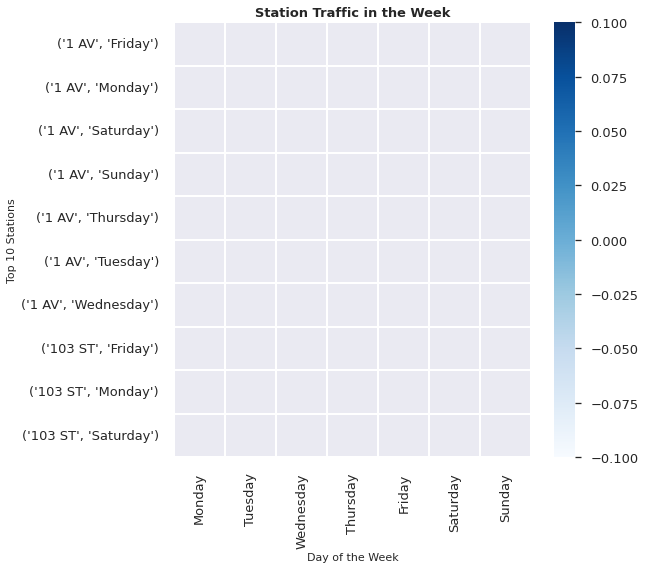

In [140]:

fig2 = plt.figure(figsize=[8,8])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
ax2 = sns.heatmap(matrix_station_day,cmap='Blues',linecolor='white',linewidths=1,fmt='')

plt.xlabel('Day of the Week',fontsize=11)
plt.ylabel('Top 10 Stations',fontsize=11)   
plt.title('Station Traffic in the Week',weight='bold',fontsize=13)
